In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [19]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)

In [20]:
x_train
#word 들이 이미 숫자로 바꿔져있음

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [21]:
x_train.shape , x_test.shape, y_train.shape

((25000,), (25000,), (25000,))

In [22]:
x_train=pad_sequences(x_train,maxlen=100)
x_test=pad_sequences(x_test,maxlen=100)
#문장 길이 똑같이 맞춰줌

In [23]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [24]:
x_train.shape

(25000, 100)

In [25]:
vocab_size=20000
embed_size=128

### build LSTM

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout ,Embedding

In [39]:
model=Sequential()
model.add(Embedding(vocab_size,embed_size,input_shape=(x_train.shape[1],)))
model.add(LSTM(units=60,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizers='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [42]:
history=model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.4424 - accuracy: 0.7940 - val_loss: 0.3541 - val_accuracy: 0.8455
Epoch 2/5
25000/25000 [==============================] - 41s 2ms/sample - loss: 0.2759 - accuracy: 0.8892 - val_loss: 0.3978 - val_accuracy: 0.8218
Epoch 3/5
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.2216 - accuracy: 0.9146 - val_loss: 0.4197 - val_accuracy: 0.8272
Epoch 4/5
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.1826 - accuracy: 0.9319 - val_loss: 0.3963 - val_accuracy: 0.8452
Epoch 5/5
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.1512 - accuracy: 0.9443 - val_loss: 0.3943 - val_accuracy: 0.8458


In [43]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

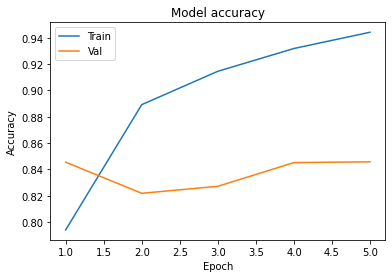

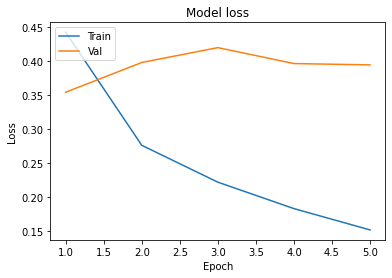

In [45]:
plot_learningCurve(history, 5)